In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import warnings
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFECV
plt.style.use('seaborn-bright')

df = pd.read_csv('./kaggle/input/spaceship-titanic/train.csv')

In [4]:
## 데이터프레임 만들기

df_notsleep = df[df['CryoSleep']==0]
df_notsleep

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
df_Earth = df_notsleep[df_notsleep['HomePlanet']=='Earth']
df_Earth

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8658,9235_01,Earth,False,F/1789/S,TRAPPIST-1e,30.0,False,8.0,752.0,0.0,0.0,687.0,Joanny Burchrison,True
8662,9242_01,Earth,False,F/1891/P,TRAPPIST-1e,62.0,False,102.0,696.0,0.0,0.0,0.0,Dary Bakerrison,True
8682,9272_01,Earth,False,G/1507/P,TRAPPIST-1e,26.0,False,240.0,242.0,510.0,0.0,0.0,Ireene Simson,True
8683,9272_02,Earth,False,F/1894/P,TRAPPIST-1e,21.0,False,86.0,3.0,149.0,208.0,329.0,Gordo Simson,False


# Europa에서 온 사람 중 동면하지 않은 사람의 Transported

<Figure size 936x288 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='Transported'>

Text(0.5, 1.0, 'Transported passangers in counts')

Text(True, 2109, '2109')

Text(False, 997, '997')

<AxesSubplot:>

([<matplotlib.patches.Wedge at 0x1f47e55dbb0>,
 [Text(-0.5865132375013671, 0.9305924039211073, 'True'),
  Text(0.5865132375013669, -0.9305924039211074, 'False')],
 [Text(-0.319916311364382, 0.5075958566842402, '67.90%'),
  Text(0.3199163113643819, -0.5075958566842403, '32.10%')])

Text(0.5, 1.0, 'Transported passangers in %')

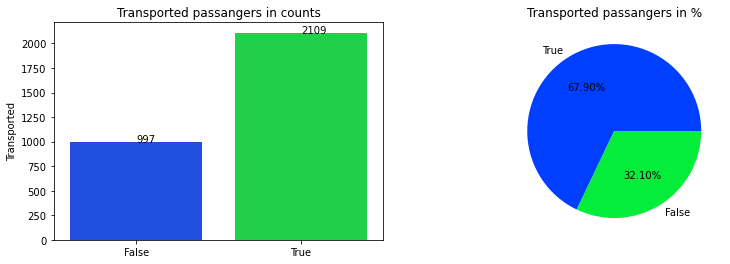

In [6]:
#Transported passangers in %
#Predictions: True for Transported, False for Lost) 
plt.figure(figsize=(13,4))
plt.subplot(121)
sbn.barplot(x=df_Earth.Transported.unique(), y=df_Earth.Transported.value_counts())
plt.title("Transported passangers in counts")
for i, j in zip(df_Earth.Transported.unique(), df_Earth.Transported.value_counts()):
    plt.annotate(str(j), xytext=(i, j), xy=(i, j))
plt.subplot(122)
plt.pie(df_Earth.Transported.value_counts(), labels=df_Earth.Transported.unique(), autopct='%.2f%%')
plt.title("Transported passangers in %")
plt.show()

### 동면+Earth 출신 = 3106명
### 동면+Earth+Transported 성공 = 2109명(67.90%)
### 동면+Europa+Transported 실패 = 997명(32.10%)

<br/>
<br/>
<br/>

# 동면+Europa+도착지

<Figure size 936x720 with 0 Axes>

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

Text(0.5, 1.0, 'Number of people travelled from HomePlanet to destination')

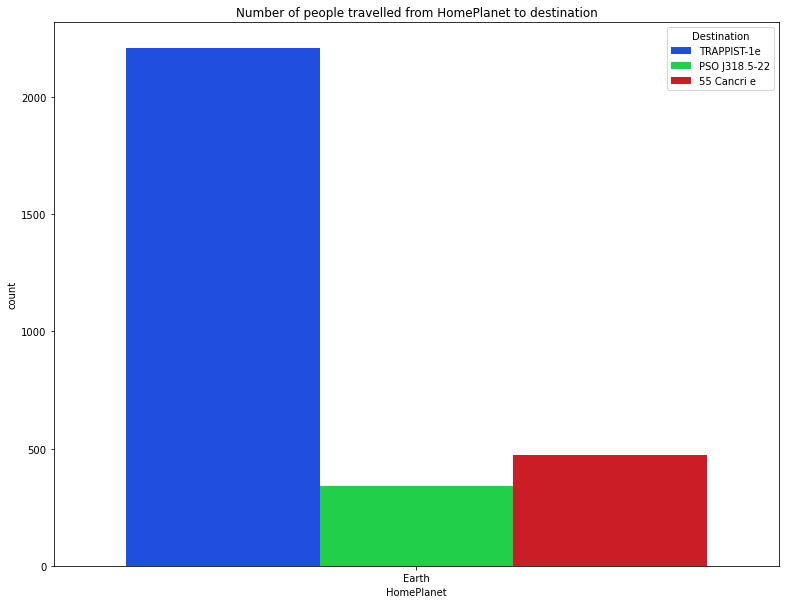

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
Destination,,,,,,,,,,,,,
55 Cancri e,472,472,472,462,470,459,467,459,463,462,459,459,472
PSO J318.5-22,340,340,340,331,334,330,332,333,336,331,333,333,340
TRAPPIST-1e,2209,2209,2209,2174,2167,2163,2157,2160,2168,2157,2152,2158,2209


In [7]:
#Number of people travelled from HomePlanet to destination
plt.figure(figsize=(13,10))
sbn.countplot(data=df_Earth, x='HomePlanet', hue='Destination')
plt.title("Number of people travelled from HomePlanet to destination")
#plt.text(x='HomePlanet',y='Destination',s=df_Europa['Destination'].count)
plt.show()

df_Earth.groupby('Destination').count()

### 동면+Earth+도착지 TRAPPIST-1e = 2209명
### 동면+Earth+도착지 55 Cancri e = 472명
### 동면+Earth+도착지 PSO J318.5-22 = 340명

<br/>
<br/>
<br/>

# _* 나이별 시각화 *_

### Earth의 나이 분포

<Figure size 1080x288 with 0 Axes>

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38'),
 Text(39, 0, '39'),
 Text(40, 0, '40'),
 Text(41, 0, '41'),
 Text(42, 0, '42'),
 Text(43, 0, '43'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '46'),
 Text(47, 0, '47'),
 Text(48, 0, '48'),
 Text(49, 0, '49'),
 Text(50, 0, '50'),


Text(0.5, 1.0, 'Visualizing people of different ages travelled from Earth')

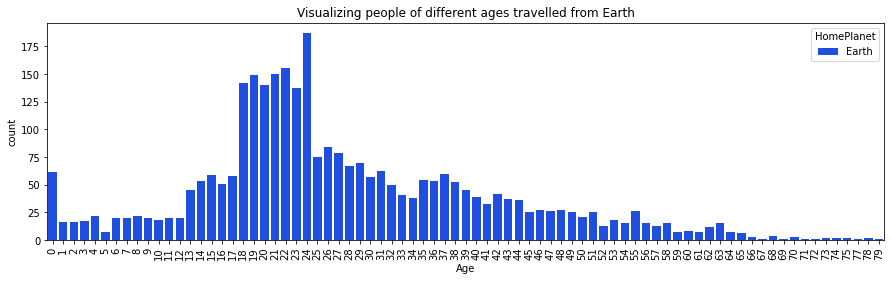

In [9]:
#Visualizing people of different ages travelled from HomePlanet
plt.figure(figsize=(15,4))
warnings.filterwarnings('ignore')
Age_nomiss=df_Earth[~(df_Earth.Age.isna())]
Age_nomiss['Age']=Age_nomiss.Age.astype('int')
g=sbn.countplot(data=Age_nomiss, x='Age', hue='HomePlanet')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Visualizing people of different ages travelled from Earth")
plt.show()

### Earth에서 도착지별 나이 분포

<Figure size 1080x288 with 0 Axes>

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38'),
 Text(39, 0, '39'),
 Text(40, 0, '40'),
 Text(41, 0, '41'),
 Text(42, 0, '42'),
 Text(43, 0, '43'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '46'),
 Text(47, 0, '47'),
 Text(48, 0, '48'),
 Text(49, 0, '49'),
 Text(50, 0, '50'),


Text(0.5, 1.0, 'Visualizing people of different ages travelled to Destination')

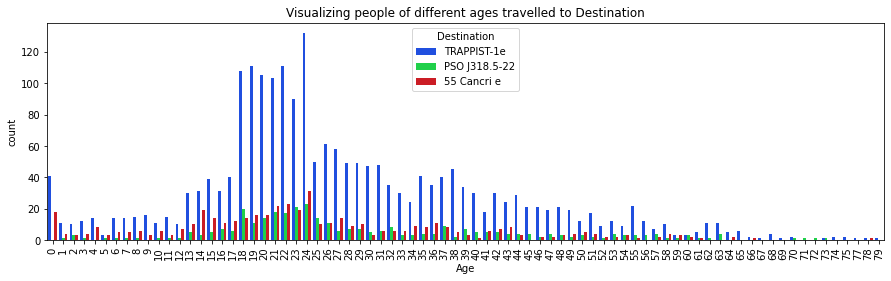

In [11]:
#Visualizing people of different ages travelled to Destination
plt.figure(figsize=(15,4))
warnings.filterwarnings('ignore')
Age_nomiss=df_Earth[~(df_Earth.Age.isna())]
Age_nomiss['Age']=Age_nomiss.Age.astype('int')
g=sbn.countplot(data=Age_nomiss, x='Age', hue='Destination')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Visualizing people of different ages travelled to Destination")
plt.show()

<br/>
<br/>
<br/>

### Europa 도착지별 평균 나이 : 24~29세

<AxesSubplot:>

Text(0.5, 1.0, 'Average Age people travelled from HomePlanet to distination')

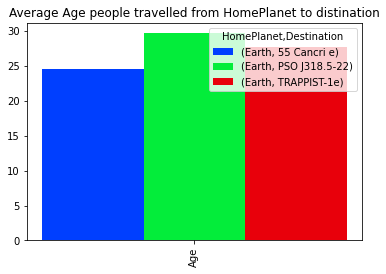

Destination
55 Cancri e      24.559574
PSO J318.5-22    29.697605
TRAPPIST-1e      27.682972
Name: Age, dtype: float64

In [12]:
pd.pivot_table(data=df_Earth, columns=['HomePlanet', 'Destination'], values='Age').plot(kind='bar', width=5)
plt.title("Average Age people travelled from HomePlanet to distination")
plt.show()

df_g = df_Earth.groupby('Destination')
age_mean = df_g['Age'].mean()
age_mean

<br/>
<br/>
<br/>


## 금액 사용 부분 - 지출평균

### 1. Room Service
#### 55 Cancri e > TRAPPIST-1e > PSO J318.5-22 

<AxesSubplot:>

Text(0.5, 1.0, 'Average ampount spent for Room Service')

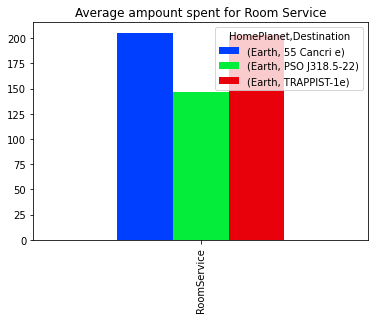

Destination
55 Cancri e      205.278373
PSO J318.5-22    146.506024
TRAPPIST-1e      202.839592
Name: RoomService, dtype: float64

In [13]:
pd.pivot_table(data=df_Earth, columns=['HomePlanet', 'Destination'], values='RoomService').plot(kind='bar')
plt.title("Average ampount spent for Room Service")
plt.show()

age_mean_R = df_g['RoomService'].mean()
age_mean_R

#### 2. FoodCourt
##### 55 Cancri e  > PSO J318.5-22 > TRAPPIST-1e

<AxesSubplot:>

Text(0.5, 1.0, 'Average ampount spent for FoodCourt')

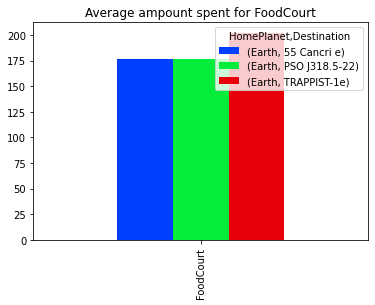

Destination
55 Cancri e      176.137255
PSO J318.5-22    176.231231
TRAPPIST-1e      202.180093
Name: FoodCourt, dtype: float64

In [14]:
pd.pivot_table(data=df_Earth, columns=['HomePlanet', 'Destination'], values='FoodCourt').plot(kind='bar')
plt.title("Average ampount spent for FoodCourt")
plt.show()

age_mean_F = df_g['FoodCourt'].mean()
age_mean_F

#### 3. ShoppingMall
#####  PSO J318.5-22 > TRAPPIST-1e  > 55 Cancri e

<AxesSubplot:>

Text(0.5, 1.0, 'Average ampount spent for ShoppingMall')

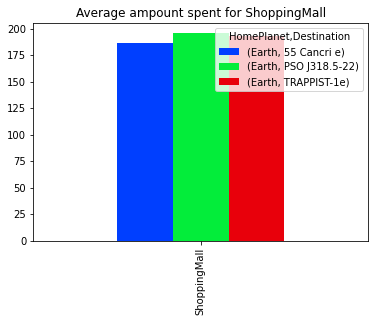

Destination
55 Cancri e      186.660907
PSO J318.5-22    195.440476
TRAPPIST-1e      193.153137
Name: ShoppingMall, dtype: float64

In [15]:
pd.pivot_table(data=df_Earth, columns=['HomePlanet', 'Destination'], values='ShoppingMall').plot(kind='bar')
plt.title("Average ampount spent for ShoppingMall")
plt.show()

age_mean_SM = df_g['ShoppingMall'].mean()
age_mean_SM

#### 4. Spa
##### TRAPPIST-1e >> 55 Cancri e > PSO J318.5-22

<AxesSubplot:>

Text(0.5, 1.0, 'Average ampount spent for Spa')

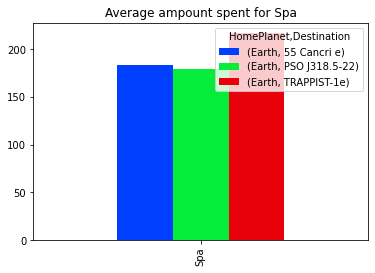

Destination
55 Cancri e      183.465368
PSO J318.5-22    178.685801
TRAPPIST-1e      216.692629
Name: Spa, dtype: float64

In [16]:
pd.pivot_table(data=df_Earth, columns=['HomePlanet', 'Destination'], values='Spa').plot(kind='bar')
plt.title("Average ampount spent for Spa")
plt.show()

age_mean_S = df_g['Spa'].mean()
age_mean_S

#### 5. VRDeck
##### PSO J318.5-22 > TRAPPIST-1e  > 55 Cancri e 

<AxesSubplot:>

Text(0.5, 1.0, 'Average ampount spent for VRDeck')

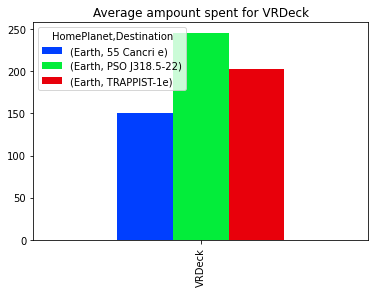

Destination
55 Cancri e      150.570806
PSO J318.5-22    245.609610
TRAPPIST-1e      203.290892
Name: VRDeck, dtype: float64

In [17]:
pd.pivot_table(data=df_Earth, columns=['HomePlanet', 'Destination'], values='VRDeck').plot(kind='bar')
plt.title("Average ampount spent for VRDeck")
plt.show()

age_mean_v = df_g['VRDeck'].mean()
age_mean_v

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

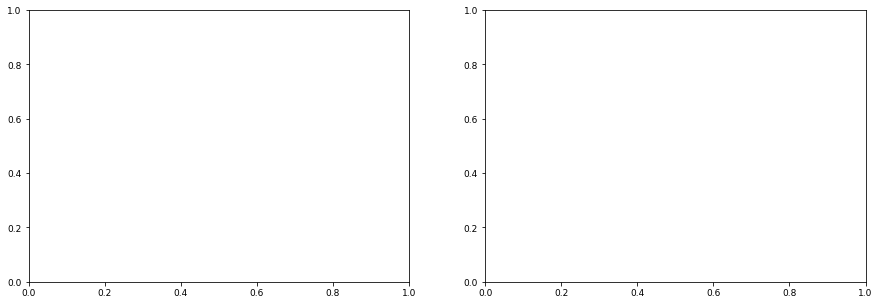

In [112]:
def no_exp(value):
    if value == 0:
        return 1
    elif value >=0:
        return 0
    else:
        return value
    
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
def plot_numerical_features(features):
    fig, axs = plt.subplots(2,3,figsize=(16,8))
    i = 0
for feature in features:
    mask = visual[feature] != 0

    sns.histplot(data=visual[mask], x=np.log(1 + visual.loc[mask, feature]), hue='Transported', kde=True, ax=axs[0, i], palette=palette)

    sns.despine()
        
    axs[0,i].set_title(feature)

    axs[0,i].set_xlabel('')

    if i != 1: axs[0,i].legend('')

    if i != 0: axs[0,i].set_ylabel('')

            
    visual[feature+'_NoExp'] = visual[feature].apply(no_exp)

    sns.countplot(data=visual, x=visual[feature+'_NoExp'], hue='Transported', ax=axs[1, i], alpha=0.95, palette=palette)
        
    sns.despine()
        
    if i != 1: axs[1,i].legend('')

    if i != 0: 
            axs[1,i].set_ylabel('')
    else:
            axs[1,i].set_ylabel('Count')
            i +=1

NameError: name 'palette' is not defined

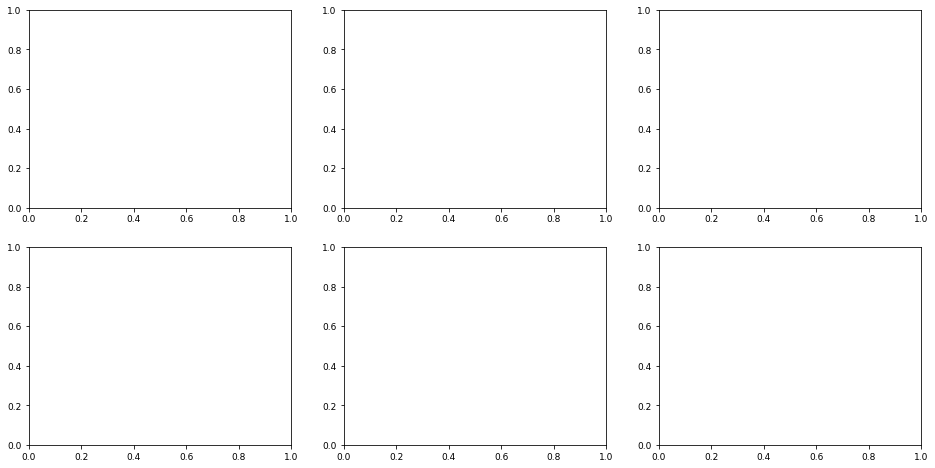

In [106]:
visual = df_Europa.copy()

# Compute total expenses
visual['TotalExpenses'] = visual['RoomService'] + visual['Spa'] + visual['VRDeck'] + visual['FoodCourt'] + visual['ShoppingMall']

# Plot features
features = ['RoomService', 'Spa', 'VRDeck']
plot_numerical_features(features)

## VIP 여부
#### VIP인 사람 : 9.47%, VIP가 아닌 사람 : 90.52%

Text(0.5, 0, 'VIP')

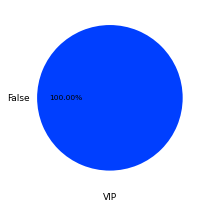

In [18]:
#Visualizing Percentages of people in 'VIP'
import matplotlib as mpl
mpl.rcParams['font.size'] = 9.0
fig = plt.figure(figsize=(15,9))
columns=['VIP']
for i, col in enumerate(columns):
    q, r = divmod(i,4)
    ax = fig.add_subplot(int(str(q+1)+"4"+str(r+1)))
    indeces = df_Earth[col].value_counts().index
    patches, texts, autotexts = ax.pie(df_Earth[col].value_counts(), labels=indeces, autopct='%.2f%%')
    for auto in autotexts:
        auto.set_fontsize(7.5)
    plt.xlabel(col)
plt.show()

In [20]:
df_Earth.groupby('VIP').count()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
VIP,,,,,,,,,,,,,
False,3035,3035,3035,2982,2952,2988,2971,2965,2979,2962,2957,2962,3035


## 각 그룹별 Transported

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

<AxesSubplot:xlabel='Destination', ylabel='count'>

<AxesSubplot:xlabel='VIP', ylabel='count'>

ValueError: Could not interpret input 'Deck'

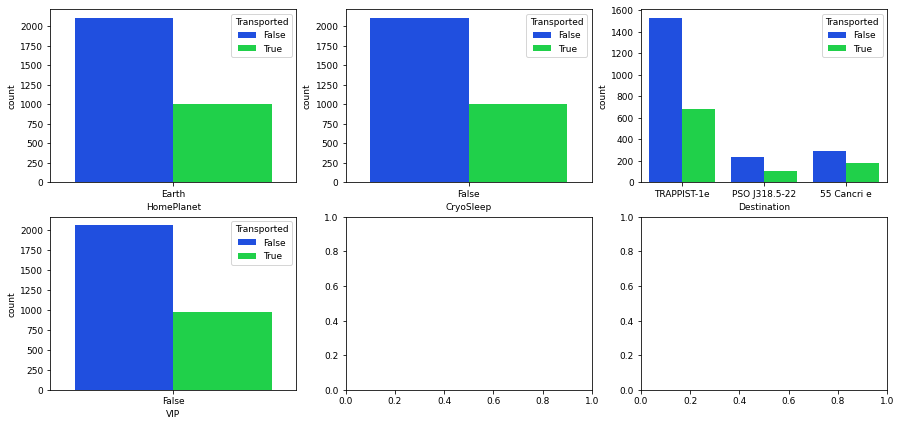

In [24]:
#Transported passangers in category wise
columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
q, r =divmod(len(columns), 3)
fig, ax=plt.subplots(q, 3, figsize=(15,7))
for i in range(0,len(columns)):
    q, r =divmod(i, 3)
    sbn.countplot(data=df_Earth, x=columns[i], hue='Transported', ax=ax[q, r])
plt.show()

Text(-0.2, 2117.693, '2109')

Text(0.2, 1005.693, '997')

Text(-0.2, 2117.693, '2109')

Text(0.2, 1005.693, '997')

Text(-0.2, 1540.693, '1532')

Text(0.8, 240.693, '232')

Text(1.8, 297.693, '289')

Text(0.2, 685.693, '677')

Text(1.2, 116.693, '108')

Text(2.2, 191.693, '183')

Text(-0.2, 2073.693, '2065')

Text(0.2, 978.693, '970')

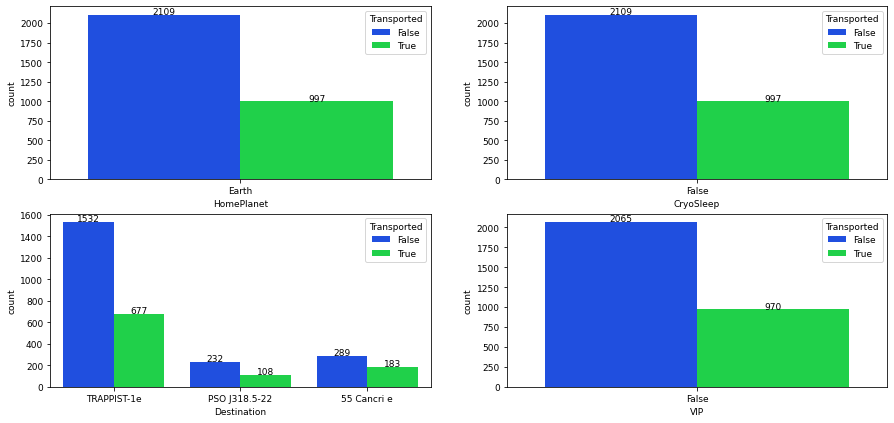

'\n\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (25,15))\n\nplt.bar(df_earth[\'Age\'], df_earth[\'RoomService\'], width=0.7, color="orange")\nplt.title(\'Test Result\')\nplt.xlabel(\'Age\')\nplt.ylabel(\'Expense\')\n\nfor i, v in enumerate(df_earth[\'Age\']):\n    plt.text(v, df_earth[\'RoomService\'].iloc[i], str(df_earth[\'RoomService\'].iloc[i]),\n             fontsize=9,\n             color="blue",\n             horizontalalignment=\'center\',\n             verticalalignment=\'bottom\')\n\n\n\nplt.show()\n'

In [42]:
#Transported passangers in category wise
columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
q, r =divmod(len(columns), 2)
fig, ax=plt.subplots(q, 2, figsize=(15,7))
for i in range(0,len(columns)):
    q, r =divmod(i, 2)
    sub = sns.countplot(data=df_Earth, x=columns[i], hue='Transported', ax=ax[q, r])
    

    for patch in sub.patches:
        sub.text(x = patch.get_x() + patch.get_width()/2,
               y = patch.get_height() + len(df)*0.001,
               s = patch.get_height(),
               ha = 'center')
plt.show()

In [22]:
df_t = df_Earth.groupby('Transported').count()
df_t

df_d = df_Earth.groupby('Destination').count()
df_d

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
Transported,,,,,,,,,,,,,
False,2109,2109,2109,2069,2053,2071,2065,2061,2056,2070,2062,2055,2060
True,997,997,997,982,968,985,970,979,979,979,971,973,973


,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
Destination,,,,,,,,,,,,,
55 Cancri e,472,472,472,462,470,459,467,459,463,462,459,459,472
PSO J318.5-22,340,340,340,331,334,330,332,333,336,331,333,333,340
TRAPPIST-1e,2209,2209,2209,2174,2167,2163,2157,2160,2168,2157,2152,2158,2209


<AxesSubplot:xlabel='Age', ylabel='Count'>

<AxesSubplot:xlabel='RoomService', ylabel='Count'>

<AxesSubplot:xlabel='FoodCourt', ylabel='Count'>

<AxesSubplot:xlabel='ShoppingMall', ylabel='Count'>

<AxesSubplot:xlabel='Spa', ylabel='Count'>

<AxesSubplot:xlabel='VRDeck', ylabel='Count'>

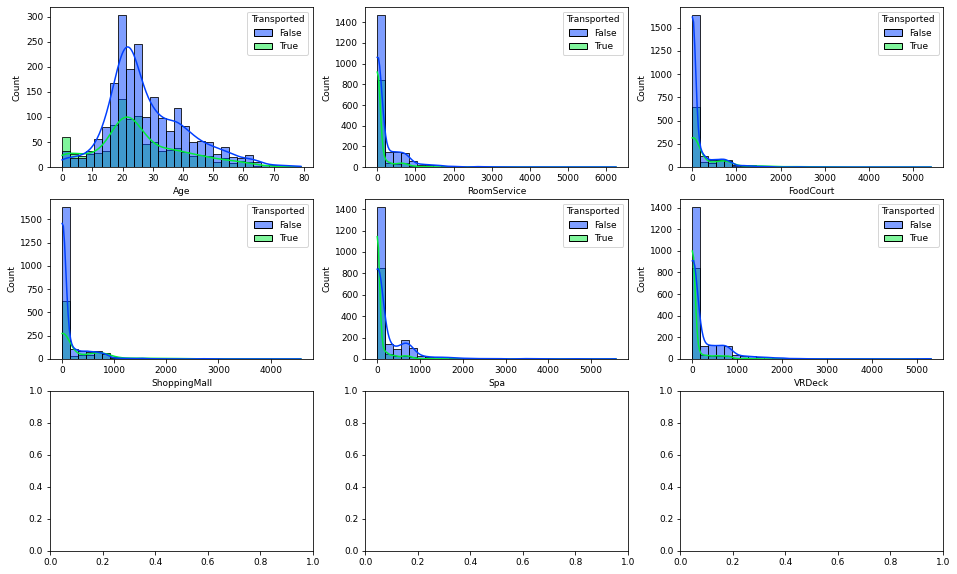

In [23]:
#Visualizing distribution of the data
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
q, r =divmod(len(columns), 3)
fig, ax=plt.subplots(q+1, 3, figsize=(16,10))
for i in range(0,len(columns)):
    q, r =divmod(i, 3)
    sbn.histplot(data=df_Earth, x=columns[i], hue='Transported', ax=ax[q, r], kde=True, bins=30)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='RoomService'>

<AxesSubplot:xlabel='Age', ylabel='FoodCourt'>

<AxesSubplot:xlabel='Age', ylabel='ShoppingMall'>

<AxesSubplot:xlabel='Age', ylabel='Spa'>

<AxesSubplot:xlabel='Age', ylabel='VRDeck'>

<AxesSubplot:xlabel='RoomService', ylabel='FoodCourt'>

<AxesSubplot:xlabel='RoomService', ylabel='ShoppingMall'>

<AxesSubplot:xlabel='RoomService', ylabel='Spa'>

<AxesSubplot:xlabel='RoomService', ylabel='VRDeck'>

<AxesSubplot:xlabel='FoodCourt', ylabel='ShoppingMall'>

<AxesSubplot:xlabel='FoodCourt', ylabel='Spa'>

<AxesSubplot:xlabel='FoodCourt', ylabel='VRDeck'>

<AxesSubplot:xlabel='ShoppingMall', ylabel='Spa'>

<AxesSubplot:xlabel='ShoppingMall', ylabel='VRDeck'>

<AxesSubplot:xlabel='Spa', ylabel='VRDeck'>

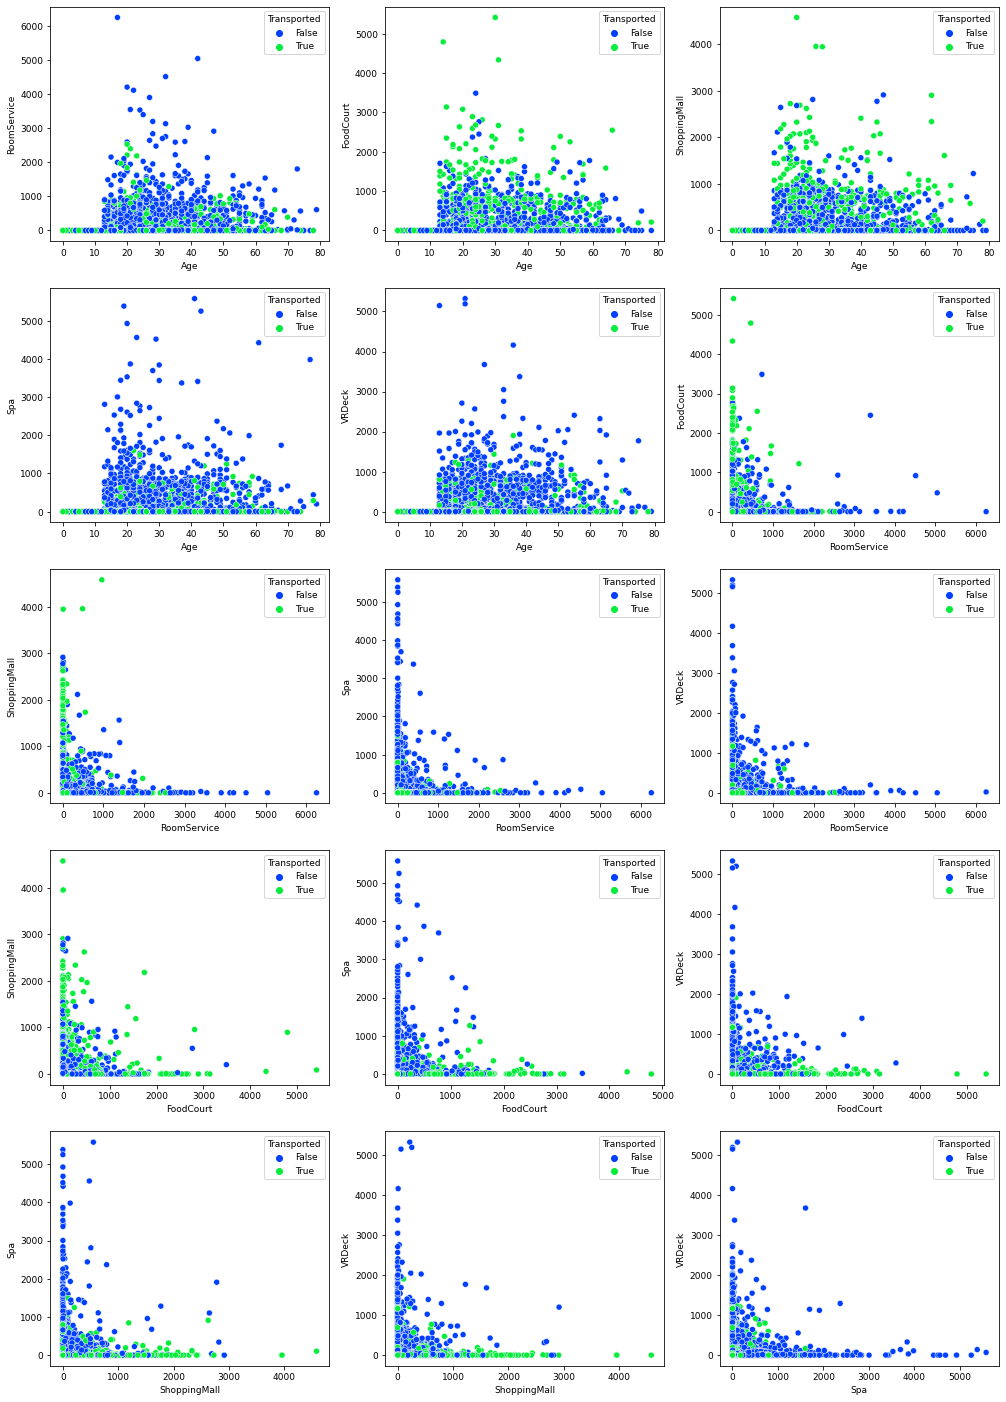

In [25]:
#Visualizing Relationships between variables 
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
q, r =divmod(int(len(columns)*(len(columns)-1)/2), 3)
fig, ax=plt.subplots(q, 3, figsize=(17,25))
k=0
for i in range(0,len(columns)):
    for j in range(i+1,len(columns)):
        q, r =divmod(k, 3)
        k+=1
        sbn.scatterplot(data=df_Earth, x=columns[i], y=columns[j], ax=ax[q, r], hue='Transported')
plt.show()

<Figure size 792x792 with 0 Axes>

<AxesSubplot:>

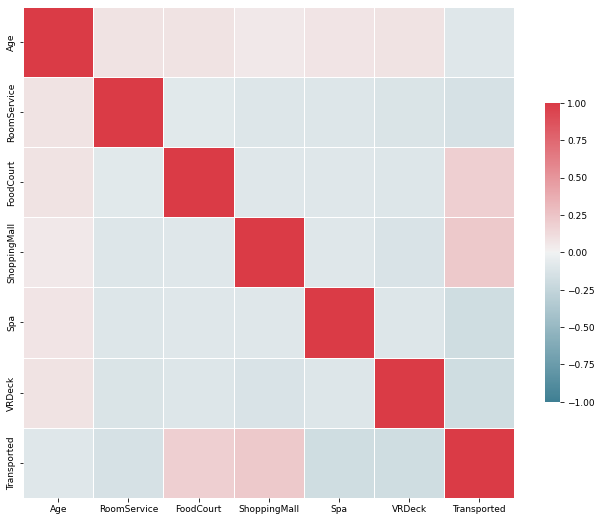

In [26]:
corr = df_Earth.corr(method='pearson')
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.diverging_palette(220,10,as_cmap=True)

plt.figure(figsize =(11,11))
sns.heatmap(corr, cmap = cmap, vmax=1.0, vmin = -1.0, center =0, square= True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()